# 利用已经归一化好的数据对20180105这天数据进行聚类

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据

In [45]:
data = pd.read_csv('./20180105_scale.csv')

## MiniBatchKMeans聚类

In [46]:
from sklearn.cluster import MiniBatchKMeans

## 尝试聚为5-20类,文件名以20180105_{聚类个数}.csv命名

In [47]:
for cluster_num in range(5, 21):
    model = MiniBatchKMeans(n_clusters=cluster_num) 
    kmeans_data = data.copy()
    y_pred = model.fit_predict(kmeans_data)
    kmeans_data['label'] = y_pred
    kmeans_data.to_csv(index=False, path_or_buf='./20180105_{0}.csv'.format(cluster_num))

## 聚为9类， 发现由于未对CALLING_NUM做处理，所以聚类结果受其影响比较大

In [57]:
model = MiniBatchKMeans(n_clusters=9) 
kmeans_data = data.copy()
y_pred = model.fit_predict(kmeans_data)

In [58]:
kmeans_data['label'] = y_pred

In [59]:
kmeans_data[kmeans_data['label'] == 0]['CALLING_NUM']

117749    1.452311e+10
117750    1.452691e+10
117751    1.470242e+10
117752    1.470243e+10
117753    1.470246e+10
117754    1.470246e+10
117755    1.470247e+10
117756    1.470247e+10
117757    1.470291e+10
117758    1.470296e+10
117759    1.470322e+10
117760    1.470338e+10
117761    1.470345e+10
117762    1.470346e+10
117763    1.470346e+10
117764    1.470347e+10
117765    1.470348e+10
117766    1.470348e+10
117767    1.470355e+10
117768    1.470355e+10
117769    1.470355e+10
117770    1.470356e+10
117771    1.470356e+10
117772    1.470356e+10
117773    1.470356e+10
117774    1.470357e+10
117775    1.470357e+10
117776    1.470357e+10
117777    1.470403e+10
117778    1.470406e+10
              ...     
179828    1.567280e+10
179829    1.567280e+10
179830    1.567281e+10
179831    1.567281e+10
179832    1.567283e+10
179833    1.567284e+10
179834    1.567284e+10
179835    1.567284e+10
179836    1.567286e+10
179837    1.567287e+10
179838    1.567288e+10
179839    1.567322e+10
179840    1

In [60]:
kmeans_data[kmeans_data['label'] == 5]['CALLING_NUM']

257159    1.836632e+10
257160    1.836632e+10
257161    1.836632e+10
257162    1.836633e+10
257163    1.836633e+10
257164    1.836633e+10
257165    1.836633e+10
257166    1.836634e+10
257167    1.836634e+10
257168    1.836635e+10
257169    1.836635e+10
257170    1.836635e+10
257171    1.836636e+10
257172    1.836636e+10
257173    1.836636e+10
257174    1.836636e+10
257175    1.836637e+10
257176    1.836637e+10
257177    1.836637e+10
257178    1.836637e+10
257179    1.836638e+10
257180    1.836638e+10
257181    1.836638e+10
257182    1.836639e+10
257183    1.836639e+10
257184    1.836639e+10
257185    1.836639e+10
257186    1.836640e+10
257187    1.836640e+10
257188    1.836641e+10
              ...     
261685    1.851919e+10
261686    1.851922e+10
261687    1.851923e+10
261688    1.851929e+10
261689    1.851931e+10
261690    1.851934e+10
261691    1.851935e+10
261692    1.851936e+10
261693    1.851946e+10
261694    1.851951e+10
261695    1.851964e+10
261696    1.851967e+10
261697    1

In [61]:
kmeans_data[kmeans_data['label'] == 8]['CALLING_NUM']

296995    1.881770e+10
296996    1.881798e+10
296997    1.881801e+10
296998    1.881818e+10
296999    1.881822e+10
297000    1.881826e+10
297001    1.881850e+10
297002    1.881865e+10
297003    1.881869e+10
297004    1.881880e+10
297005    1.881885e+10
297006    1.881886e+10
297007    1.881889e+10
297008    1.881893e+10
297009    1.881913e+10
297010    1.881922e+10
297011    1.881923e+10
297012    1.881928e+10
297013    1.881931e+10
297014    1.881947e+10
297015    1.881949e+10
297016    1.881981e+10
297017    1.881982e+10
297018    1.881982e+10
297019    1.881982e+10
297020    1.882000e+10
297021    1.882014e+10
297022    1.882022e+10
297023    1.882026e+10
297024    1.882027e+10
              ...     
312373    1.999940e+10
312374    1.999940e+10
312375    1.999946e+10
312376    1.999951e+10
312377    1.999958e+10
312378    1.999959e+10
312379    2.020348e+10
312380    2.043066e+10
312381    2.093209e+10
312382    2.101020e+10
312383    2.203099e+10
312384    2.213440e+10
312385    2

### 利用pca降维

In [6]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA()
data =pca.fit_transform(kmeans_data)
data = pd.DataFrame(data,index=kmeans_data.index)
plt.scatter(data[0], data[1], c=y_pred)
plt.xlim(data[0].min()-1000, data[0].mean()) #特孤立的点不展示

(-108447911405.76123, 0.0)

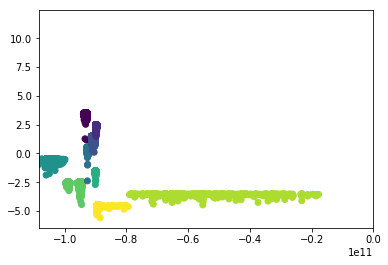

In [69]:
plt.show()

## 其他聚类算法尝试

AffinityPropagation与Birch对memory要求较高，本地40G不够用

In [22]:
from sklearn.cluster import AffinityPropagation

In [23]:
model = AffinityPropagation()

In [24]:
aff_data = data.copy()

In [20]:
y_pred = model.fit_predict(aff_data)

MemoryError: 